In [51]:
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import splitfolders

import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Conv2D, MaxPooling2D, Dropout

In [52]:
class config:
    epoch = 60
    model_input = tf.keras.Input(shape=(128, 128, 3))

    # For the parameter in the flow from directory
    # 把每樣不同大小的資料伸縮變成 128x128，batch_size = 32，可以嘗試其他看看size
    batch_size = 32
    img_width = 128
    img_height = 128

    # The augmetnation parameter (伸縮參數)
    rotation_range = 0.4
    width_shift_range = 0.2
    height_shift_range = 0.3
    shear_range = 0.2
    zoom_range = 0.2

    # 產生Image Data Generator
    # 資料路徑
    path_train = "./output/train"
    path_test = "./output/test"
    path_val = "./output/val"

In [53]:
# 資料前處理
# 把資料分成 train, validation, test : 8:1:1
splitfolders.ratio('flowers', output="output", seed=101, ratio=(0.8, 0.1, 0.1))      # (train:val:test)

# 用 ImageDataGenerator 來調整照片
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = config.rotation_range,
                                   width_shift_range = config.width_shift_range,
                                   height_shift_range = config.height_shift_range,
                                   shear_range = config.shear_range,
                                   zoom_range = config.zoom_range,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                  )

train_generator = train_datagen.flow_from_directory(directory = config.path_train,
                                                    batch_size = config.batch_size,
                                                    class_mode = "categorical",
                                                    target_size = (config.img_width, config.img_height)
                                                    )

test_datagen = ImageDataGenerator(rescale = 1./255.)

test_generator = test_datagen.flow_from_directory(directory = config.path_test,
                                                  batch_size = config.batch_size,
                                                  class_mode = "categorical",
                                                  target_size = (config.img_width, config.img_height)
                                                  )

valid_datagen = ImageDataGenerator(rescale = 1./255.)

valid_generator = test_datagen.flow_from_directory(directory = config.path_val,
                                                  batch_size = config.batch_size,
                                                  class_mode = "categorical",
                                                  target_size = (config.img_width, config.img_height)
                                                  )

Copying files: 12847 files [00:14, 876.12 files/s] 


Found 10274 images belonging to 13 classes.
Found 1294 images belonging to 13 classes.
Found 1279 images belonging to 13 classes.


In [54]:
from tensorflow.keras.applications.vgg16 import VGG16

# 呼叫 VGG16 模型
# include_top=False  -> 只利用VGG16萃取特徵，後面的分類處理，都要自己設計。
# weights='imagenet' -> 即使用ImageNet的預先訓練的資料，約100萬張圖片，判斷1000類別的日常事物，例如動物、交通工具...等，我們通常選這一項。
a_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128,3))

# freeze extraction layers
a_model.trainable = False

# add custom top layers
x = a_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(a_model.output)
predictions = Dense(13, activation = 'softmax')(x)
VGG16_model = Model(inputs = a_model.input, outputs = predictions)
print(VGG16_model.summary())

# confirm unfrozen layers
for layer in a_model.layers:
    if layer.trainable == True:
        print(layer)

# 編譯model
VGG16_model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

VGG16_model.save('VGG16_model.h5')

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [55]:
from tensorflow.keras.applications.vgg19 import VGG19

# 呼叫 VGG16 模型
# include_top=False  -> 只利用VGG16萃取特徵，後面的分類處理，都要自己設計。
# weights='imagenet' -> 即使用ImageNet的預先訓練的資料，約100萬張圖片，判斷1000類別的日常事物，例如動物、交通工具...等，我們通常選這一項。
b_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128,3))

# freeze extraction layers
b_model.trainable = False

# add custom top layers
x = b_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(b_model.output)
predictions = Dense(13, activation = 'softmax')(x)
VGG16_model = Model(inputs = b_model.input, outputs = predictions)
print(VGG16_model.summary())

# confirm unfrozen layers
for layer in b_model.layers:
    if layer.trainable == True:
        print(layer)

# 編譯model
VGG16_model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

VGG16_model.save('VGG19_model.h5')

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [56]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3), padding='same'))
cnn_model.add(MaxPooling2D(2, 2))

cnn_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(2, 2))

cnn_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(2, 2))

cnn_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(2, 2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(13, activation='softmax'))

print(cnn_model.summary())

cnn_model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

cnn_model.save('SimpleCNN_model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [57]:
from tensorflow.keras.optimizers import Adagrad
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
keras_model = tensorflow.keras.models.load_model('VGG16_model.h5', compile=False)
keras_model._name = 'model1'
keras_model2 = tensorflow.keras.models.load_model('SimpleCNN_model.h5', compile=False)
keras_model2._name = 'model2'
keras_model3 = tensorflow.keras.models.load_model('VGG19_model.h5', compile=False)
keras_model3._name = 'model3'
models = [keras_model, keras_model2, keras_model3]
model_input = tf.keras.Input(shape=(128, 128, 3))
# model_input = tf.keras.Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)  

ensemble_model.compile( loss = 'categorical_crossentropy',
                        optimizer = 'Adam',
                        metrics=['accuracy'])

ensemble_model.save('ensmeble.h5')

In [58]:
base_model = load_model('ensmeble.h5')

print(base_model.summary())

base_model.trainable = False

history = base_model.fit(   train_generator,
                            validation_data = test_generator,
                            epochs = config.epoch, 
                            steps_per_epoch = config.batch_size,
                            verbose = 1,
                            shuffle = True)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model1 (Functional)            (None, 13)           14821197    ['input_24[0][0]']               
                                                                                                  
 model2 (Sequential)            (None, 13)           1147821     ['input_24[0][0]']               
                                                                                                  
 model3 (Functional)            (None, 13)           20130893    ['input_24[0][0]']        

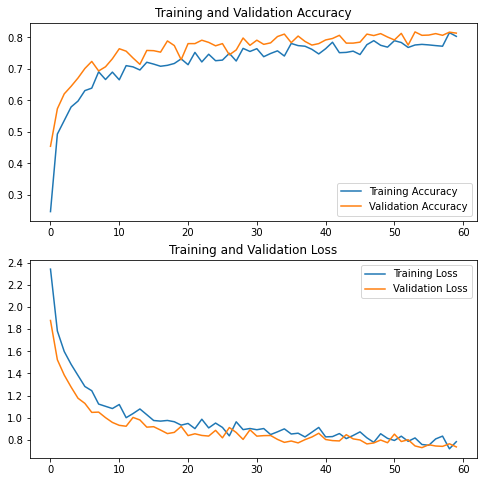

In [59]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(config.epoch)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
_, acc = base_model.evaluate(test_generator, steps=len(test_generator), verbose=0)
print('Accuracy: %.3f' % (acc))

Accuracy: 0.813
